(D:\a27_YEARS_OLD\pyspark\venv)

"If a car travels at 60 km/h for 2.5 hours, how far does it travel?"

In [1]:
def chain_of_thought_reasoning(problem):
    steps = []
    
    # Step 1: Extract key values
    steps.append("Step 1: Identify given values - Speed = 60 km/h, Time = 2.5 hours.")
    
    # Step 2: Use the distance formula
    steps.append("Step 2: Use the formula Distance = Speed × Time.")
    
    # Step 3: Perform calculation
    distance = 60 * 2.5
    steps.append(f"Step 3: Compute 60 × 2.5 = {distance} km.")
    
    # Step 4: Conclusion
    steps.append(f"Final Answer: The car travels {distance} km.")
    
    return "\n".join(steps)

# Run the function
problem = "If a car travels at 60 km/h for 2.5 hours, how far does it travel?"
result = chain_of_thought_reasoning(problem)
print(result)


Step 1: Identify given values - Speed = 60 km/h, Time = 2.5 hours.
Step 2: Use the formula Distance = Speed × Time.
Step 3: Compute 60 × 2.5 = 150.0 km.
Final Answer: The car travels 150.0 km.


Creating a physics simulation for this problem requires implementing a simple physics engine that simulates motion over time. We'll use Python and Pygame (for visualization) or Matplotlib (for plotting the movement) to animate the car’s journey.

Plan for the Physics Simulation
Define the Motion Equations
Use Distance = Speed × Time
Update position frame-by-frame using a small Δt
Use a Physics Engine Approach
Define time steps (dt).
Update car's position at each step using kinematics.
Use Pygame to visualize the movement.

In [ ]:
# run as .py file
import pygame 
import time

# Initialize Pygame
pygame.init()

# Constants
WIDTH, HEIGHT = 800, 400
WHITE = (255, 255, 255)
BLUE = (0, 0, 255)

# Car attributes
car_x = 50  # Start position (in pixels)
car_y = HEIGHT // 2  # Keep car centered
speed_kmh = 60  # Speed in km/h
speed_px_per_sec = (speed_kmh * 1000 / 3600)  # Convert to pixels/sec
total_time = 2.5  # Travel time in hours
fps = 60  # Frames per second
dt = 1 / fps  # Time step

# Set up display
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Physics Simulation - Car Motion")
car = pygame.image.load("car.png")  # Load a car image (add a car.png in the same directory)
car = pygame.transform.scale(car, (100, 50))  # Resize car

running = True
start_time = time.time()

# Main simulation loop
while running:
    screen.fill(WHITE)
    
    # Get elapsed time
    elapsed_time = time.time() - start_time
    
    # Update car position
    car_x += speed_px_per_sec * dt
    
    # Stop the simulation after total_time
    if elapsed_time >= total_time * 3600:  # Convert hours to seconds
        running = False
    
    # Draw car
    screen.blit(car, (car_x, car_y))
    
    # Refresh display
    pygame.display.flip()
    pygame.time.delay(int(dt * 1000))  # Convert to milliseconds

# Quit Pygame
pygame.quit()


pygame 2.6.1 (SDL 2.28.4, Python 3.13.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

: 

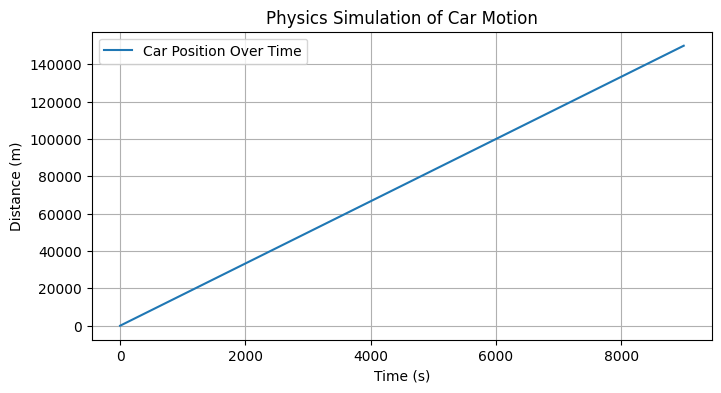

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
speed_kmh = 60
time_hours = 2.5
speed_mps = speed_kmh * 1000 / 3600  # Convert km/h to m/s
total_time = time_hours * 3600  # Convert hours to seconds

# Time steps
dt = 0.1  # Small time step
time_steps = np.arange(0, total_time, dt)

# Position calculation
positions = speed_mps * time_steps  # Distance = Speed × Time

# Plot the motion
plt.figure(figsize=(8, 4))
plt.plot(time_steps, positions, label="Car Position Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Physics Simulation of Car Motion")
plt.legend()
plt.grid()
plt.show()


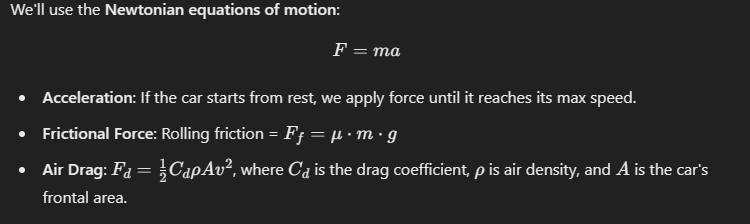

In [8]:
import decimal
decimal.getcontext().prec = 100

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
0.0
0.00011229166666666667
0.00011229166666666667
0.00011229166666666667
0.00011229166666666667
0.00011229166666666667
0.00011229166666666667
0.00011229166666666667
0.00011229166666666667
0.00011229166666666667
0.00011229166666666667
0.00011229166666666667
0.00011229166666666667
0.00011229166666666667
4.5803714907172085e-05
4.118076768689644e-05
0.0008385892035451138
0.0037039301109457437
0.010431958183652118
0.02335552959196774
0.045366019259945024
0.07995158099272848
0.13126180983087052
0.20420972237995566
0.3046251307427649
0.4394779469910525
0.6171964600277923
0.8481152927023164
1.1451022859971804
1.5244356447235907


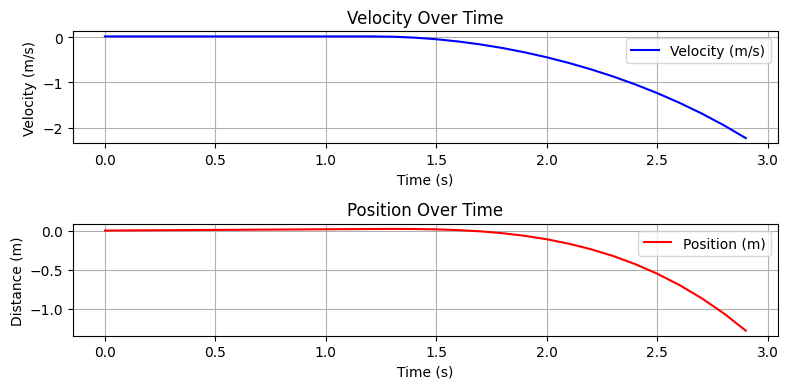

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mass = 12  # kg
target_speed = 6 * 10 / 3600  # Convert km/h to m/s
acceleration = 2  # m/s²
drag_coefficient = 0.3
frontal_area = 2.2  # m²
air_density = 1.225  # kg/m³
rolling_friction = 0.015
gravity = 9.81
dt = 0.1
total_time = 3  # Simulate for 3 seconds

# Time steps
time_steps = np.arange(0, total_time, dt)
print(time_steps)

# Lists to store values
velocities = []
positions = []
velocity = 0
position = 0

for t in time_steps:
    force_friction = rolling_friction * mass * gravity
    force_drag = 0.5 * drag_coefficient * air_density * frontal_area * velocity ** 2
    print(force_drag)
    net_force = mass * acceleration - (force_friction + force_drag)
    
    acceleration = net_force / mass
    velocity += acceleration * dt
    velocity = min(velocity, target_speed)  # Prevent exceeding max speed
    
    position += velocity * dt

    velocities.append(velocity)
    positions.append(position)

# Plot results
plt.figure(figsize=(8, 4))

plt.subplot(2, 1, 1)
plt.plot(time_steps, velocities, label="Velocity (m/s)", color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time_steps, positions, label="Position (m)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Position Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Generating a Physics Simulation from a Prompt

To allow users to input a natural language prompt (like: "A car starts at rest and accelerates to 60 km/h over 2.5 hours with friction and air resistance."), we can use natural language processing (NLP) to extract relevant physics parameters.

In [ ]:
# Plan
# Extract Key Parameters from the prompt:

# Initial velocity (e.g., "starts at rest" → v0 = 0 m/s).
# Final velocity (e.g., "reaches 60 km/h" → v = 60 * 1000 / 3600).
# Time duration (e.g., "over 2.5 hours" → t = 2.5 * 3600).
# Forces (e.g., "with friction and air resistance" → drag_coefficient, rolling_friction).
# Use an NLP model (like GPT) or regex-based parsing to extract values from the input.

# Simulate Motion dynamically based on extracted values.

In [11]:
from decimal import Decimal

In [35]:
import re

def parse_physics_prompt(prompt):
    """
    Extracts physics parameters from a natural language prompt.
    """
    # Default values
    params = {
        "initial_velocity": 0,   # m/s (assuming "starts at rest")
        "final_velocity": 0,     # m/s (to be extracted)
        "time": 0,               # seconds
        "drag_coefficient": 0.3, # Default Cd value
        "rolling_friction": 0.015 # Default rolling friction
    }

    # Extract final velocity (e.g., "60 km/h")
    velocity_match = re.search(r"(\d+)\s*km/h", prompt)
    if velocity_match:
        params["final_velocity"] = round((int(velocity_match.group(1)) * 1000 / 3600),2)  # Convert to m/s

    # Extract time (e.g., "2.5 hours")
    time_match = re.search(r"([\d\.]+)\s*hours?", prompt)
    if time_match:
        params["time"] = float(time_match.group(1)) * 3600  # Convert to seconds

    # Check for friction and drag in the text
    if "friction" in prompt.lower():
        params["rolling_friction"] = 0.02  # Adjust for high friction
    if "air resistance" in prompt.lower():
        params["drag_coefficient"] = 0.35  # Adjust for stronger air drag

    return params

# Example Prompt
prompt = "A car starts at rest and accelerates to 60 km/h over 0.0005 hours with friction and air resistance."
physics_params = parse_physics_prompt(prompt)
print(physics_params)


{'initial_velocity': 0, 'final_velocity': 16.67, 'time': 1.8, 'drag_coefficient': 0.35, 'rolling_friction': 0.02}


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7]


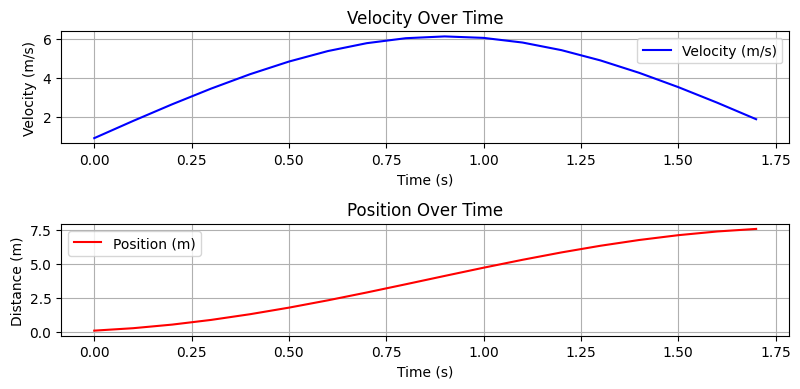

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Extracted parameters
params = physics_params
v0 = params["initial_velocity"]
vf = params["final_velocity"]
t = params["time"]
Cd = params["drag_coefficient"]
friction = params["rolling_friction"]

# Car properties
mass = 12  # kg
frontal_area = 2.2  # m²
air_density = 1.225  # kg/m³
gravity = 9.81  # m/s²

# Compute acceleration using kinematics
acceleration = (vf - v0) / t

# Time steps
dt = 0.1
time_steps = np.arange(0, t, dt)
print(time_steps)

# Lists for storing values
velocities = []
positions = []
velocity = v0
position = 0

for time in time_steps:
    # Forces
    force_friction = friction * mass * gravity
    force_drag = 0.5 * Cd * air_density * frontal_area * velocity ** 2
    net_force = mass * acceleration - (force_friction + force_drag)
    
    # Compute acceleration
    acceleration = net_force / mass
    velocity += acceleration * dt
    velocity = min(velocity, vf)  # Ensure it doesn't exceed target
    
    position += velocity * dt
    velocities.append(velocity)
    positions.append(position)

# Plot the motion
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(time_steps, velocities, label="Velocity (m/s)", color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time_steps, positions, label="Position (m)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Position Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Steps to Create a Simulation from a Prompt

Extract Physics Parameters using NLP (similar to the previous approach).
Use Genesis Engine to Simulate Motion by defining:

Objects (e.g., a car)

Forces (gravity, air resistance, friction, acceleration)
Constraints (e.g., max velocity)
Run the Simulation & Visualize the Motion.

In [37]:
from genesis import World, Body, Vec2

ImportError: cannot import name 'World' from 'genesis' (d:\a27_YEARS_OLD\pyspark\venv\Lib\site-packages\genesis\__init__.py)